<a href="https://colab.research.google.com/github/jagat0112/find_similar_app/blob/main/Finding_similar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving top5-players24-25.xlsx to top5-players24-25.xlsx


In [3]:
df = pd.read_excel('top5-players24-25.xlsx')

In [4]:
df.drop_duplicates()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Gls_90,Ast_90,G+A_90,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90
0,1,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,24.0,2000.0,3,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2,Max Aarons,eng ENG,"DF,MF",Valencia,es La Liga,24.0,2000.0,4,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.00,0.02
2,3,Rodrigo Abajas,es ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,...,0.00,0.00,0.00,0.00,0.00,0.10,0.00,0.10,0.10,0.10
3,4,James Abankwah,ie IRL,"DF,MF",Udinese,it Serie A,20.0,2004.0,6,0,...,0.00,0.00,0.00,0.00,0.00,0.06,0.00,0.06,0.06,0.06
4,5,Keyliane Abdallah,fr FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2849,2850,Edhy Zuliani,fr FRA,DF,Toulouse,fr Ligue 1,19.0,2004.0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2850,2851,Szymon Żurkowski,pl POL,MF,Empoli,it Serie A,26.0,1997.0,5,0,...,0.00,0.00,0.00,0.00,0.00,0.07,0.00,0.07,0.07,0.07
2851,2852,Martin Ødegaard,no NOR,MF,Arsenal,eng Premier League,25.0,1998.0,30,26,...,0.12,0.31,0.43,0.08,0.39,0.19,0.21,0.40,0.16,0.37
2852,2853,Milan Đurić,ba BIH,FW,Monza,it Serie A,34.0,1990.0,18,13,...,0.28,0.07,0.35,0.28,0.35,0.21,0.08,0.28,0.21,0.28


In [5]:
key_columns = ["Player", "xG_90", "Ast_90", "G+A_90"]  # You can add more if needed
df = df.dropna(subset=key_columns)


In [6]:
#Standardization

In [7]:
#only selected useful features
features = [
    "Age", "MP", "Starts", "Min", "90s",
    "Gls_90", "Ast_90", "G+A_90", "G-PK_90",
    "xG_90", "xAG_90", "xG+xAG_90",
    "npxG_90", "npxG+xAG_90", "PrgC", "PrgP", "PrgR"
]


In [8]:
X = df[features].copy()

In [9]:
X = X.dropna()
df = df.loc[X.index]

print(X)

       Age  MP  Starts   Min   90s  Gls_90  Ast_90  G+A_90  G-PK_90  xG_90  \
0     24.0   3       1    86   1.0    0.00    0.00    0.00     0.00   0.00   
1     24.0   4       1   120   1.3    0.00    0.00    0.00     0.00   0.00   
2     21.0   1       1    65   0.7    0.00    0.00    0.00     0.00   0.10   
3     20.0   6       0    88   1.0    0.00    0.00    0.00     0.00   0.06   
4     18.0   1       0     3   0.0    0.00    0.00    0.00     0.00   0.00   
...    ...  ..     ...   ...   ...     ...     ...     ...      ...    ...   
2849  19.0   1       0     9   0.1    0.00    0.00    0.00     0.00   0.00   
2850  26.0   5       0   106   1.2    0.00    0.00    0.00     0.00   0.07   
2851  25.0  30      26  2325  25.8    0.12    0.31    0.43     0.08   0.19   
2852  34.0  18      13  1270  14.1    0.28    0.07    0.35     0.28   0.21   
2853  34.0   9       3   268   3.0    0.34    0.00    0.34     0.34   0.08   

      xAG_90  xG+xAG_90  npxG_90  npxG+xAG_90  PrgC  PrgP  PrgR

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
print(X_scaler)

[[-2.26900810e-01 -1.39629832e+00 -1.10701136e+00 ... -7.41969794e-01
  -7.44092927e-01 -6.99441579e-01]
 [-2.26900810e-01 -1.30935236e+00 -1.10701136e+00 ... -7.79490157e-01
  -7.83962053e-01 -5.82516813e-01]
 [-8.94928091e-01 -1.57019023e+00 -1.10701136e+00 ... -6.66929068e-01
  -8.63700304e-01 -6.99441579e-01]
 ...
 [-4.22504957e-03  9.51242550e-01  1.10018658e+00 ...  2.67238325e+00
   4.23954776e+00  1.82279266e+00]
 [ 1.99985679e+00 -9.21089471e-02 -4.75563519e-02 ... -7.04449431e-01
  -4.84943611e-01 -2.48446053e-01]
 [ 1.99985679e+00 -8.74622570e-01 -9.30435527e-01 ... -7.79490157e-01
  -7.64027490e-01 -6.49330965e-01]]


In [11]:
#KMeans Clustering + PCA for Visualization

In [12]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaler)

In [13]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaler, cluster_labels)
print(sil_score)

0.28478344190083865


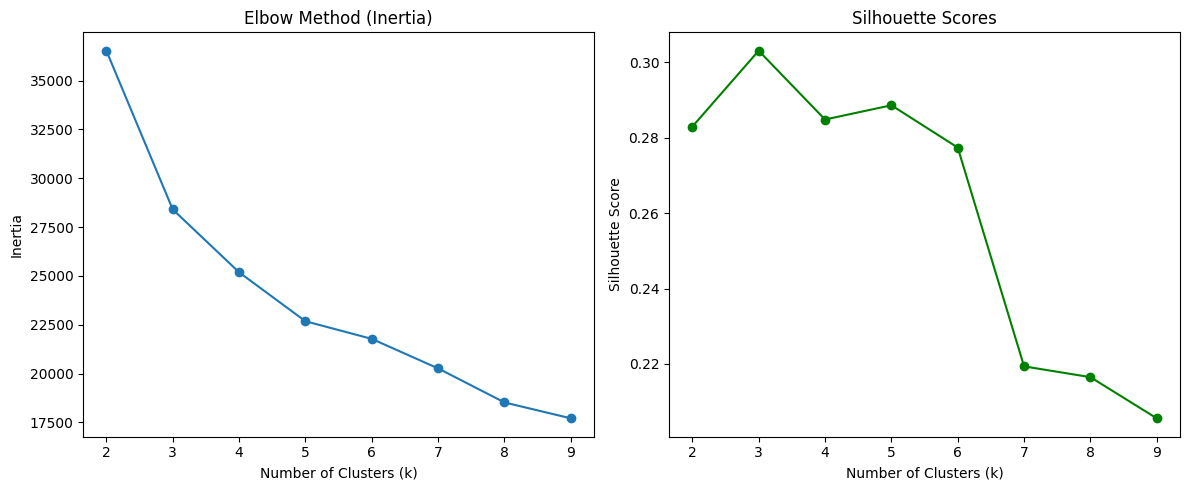

In [21]:
from sklearn.metrics import silhouette_score

inertias = []
sil_scores = []
k_range = range(2, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaler)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaler, labels))



[36529.5783888894, 28405.685641374635, 25187.79659115869, 22681.83880682694, 21778.822929584032, 20267.140352762974, 18524.991669433497, 17711.52398017799]
[np.float64(0.2828869768033569), np.float64(0.3030180068461106), np.float64(0.28478344190083865), np.float64(0.28856029525877713), np.float64(0.27735767521768184), np.float64(0.21936258672818348), np.float64(0.21650655099856175), np.float64(0.20559051897967554)]


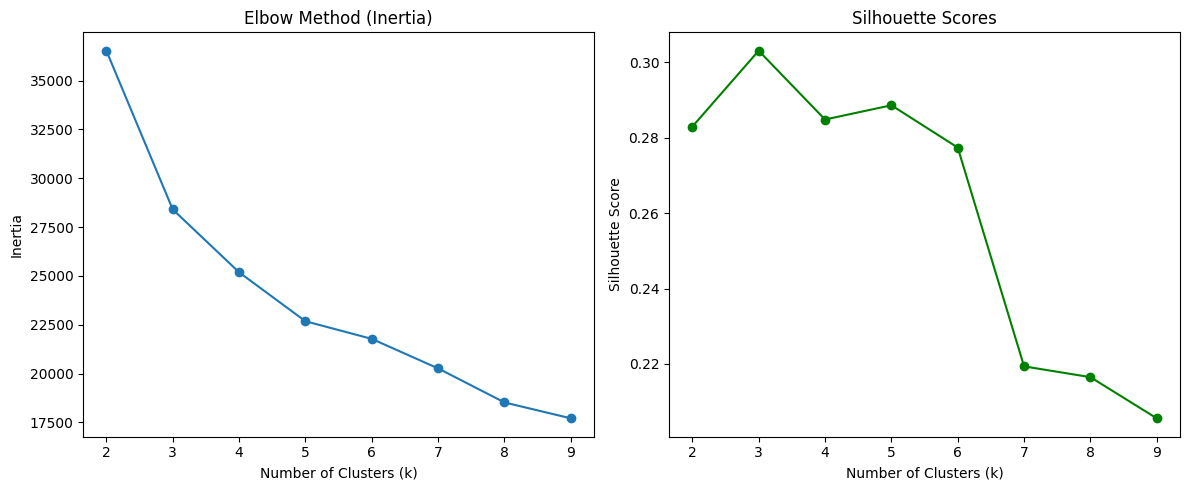

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


intertia = []
sil_range = []
k_range = range(2,10)

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(X_scaler)
  intertia.append(kmeans.inertia_)
  sil_range.append(silhouette_score(X_scaler, labels))


print(intertia)
print(sil_range)

# Plot Elbow + Silhouette
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, intertia, marker='o')
plt.title("Elbow Method (Inertia)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(k_range, sil_range, marker='o', color='green')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")

plt.tight_layout()
plt.show()


In [30]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaler)

print(silhouette_score(X_scaler,clusters ))

0.3030180068461106


In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaler)

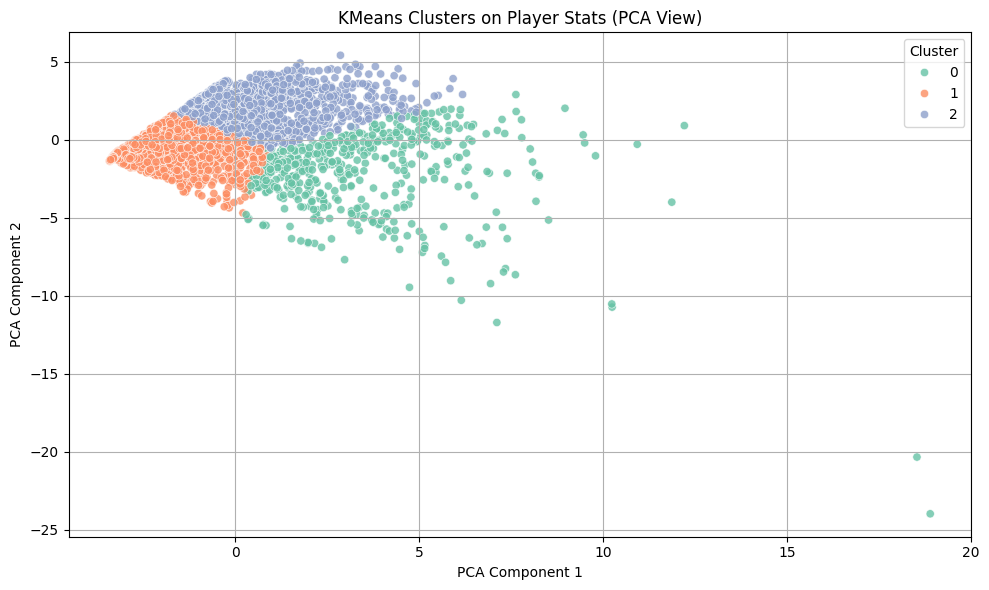

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: attach PCA and clusters to original dataframe
df["Cluster"] = clusters
df["PCA1"] = pca_data[:, 0]
df["PCA2"] = pca_data[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", alpha=0.8)
plt.title("KMeans Clusters on Player Stats (PCA View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.tight_layout()
plt.show()


In [42]:
# Filter only the Salah who plays for Liverpool
salah_row = df[df["Player"].str.contains("Palmer", case=False, na=False) & df["Squad"].str.contains("Chelsea", case=False, na=False)]


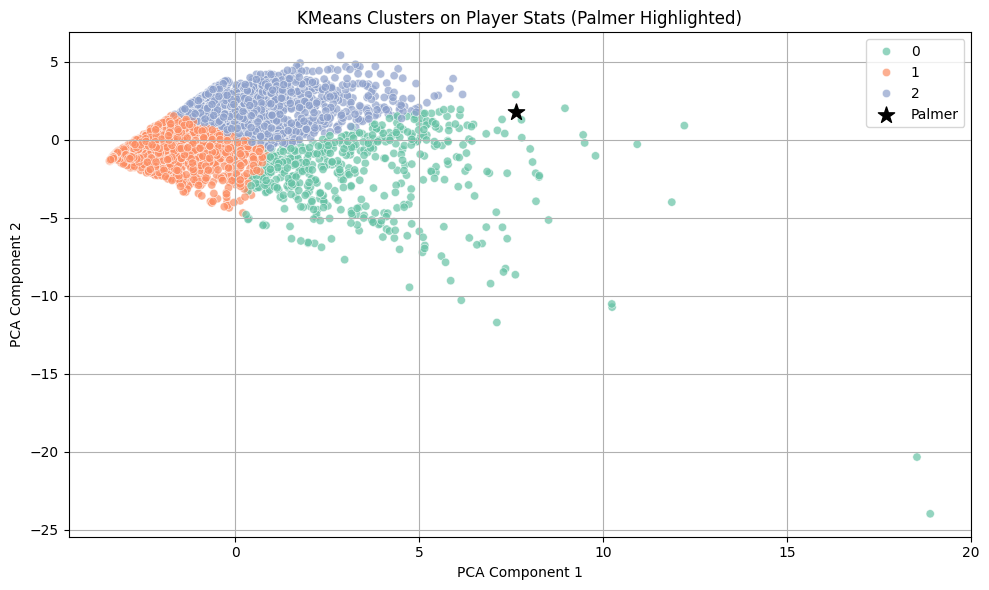

In [44]:
plt.figure(figsize=(10, 6))

# Plot all players colored by cluster
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", alpha=0.7)

# Highlight Salah
plt.scatter(
    salah_row["PCA1"], salah_row["PCA2"],
    color='black', s=150, marker='*', label="Palmer"
)

plt.title("KMeans Clusters on Player Stats (Palmer Highlighted)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
palmer_row = df[df["Player"].str.contains("Palmer", case=False, na=False)]

palmer_cluster = palmer_row["Cluster"].values[0]
print(f"Cole Palmer is in Cluster: {palmer_cluster}")


Cole Palmer is in Cluster: 1


In [46]:
similar_players = df[df["Cluster"] == palmer_cluster]


In [47]:
similar_players.sort_values("G+A_90", ascending=False)[
    ["Player", "Nation", "Pos", "Age", "G+A_90", "xG_90", "xAG_90"]
].head(10)


,Player,Nation,Pos,Age,G+A_90,xG_90,xAG_90
2569,Arnau Tenas,es ESP,GK,23.0,1.00,0.00,0.21
1384,Ismael Konate,ci CIV,"FW,MF",18.0,0.78,0.15,0.03
388,Tim Breithaupt,de GER,MF,22.0,0.75,0.04,0.29
2038,Kevin Paredes,us USA,DF,21.0,0.73,0.27,0.05
2664,Jesús Vallejo,es ESP,DF,27.0,0.65,0.00,0.08
1192,Elseid Hysaj,al ALB,DF,30.0,0.64,0.04,0.35
408,Manu Bueno,es ESP,"MF,FW",20.0,0.64,0.08,0.00
2305,Anass Salah-Eddine,nl NED,DF,22.0,0.59,0.19,0.08
1687,Luca Mazzitelli,it ITA,MF,28.0,0.54,0.06,0.15
2203,Gio Reyna,us USA,MF,21.0,0.51,0.04,0.06


In [48]:
df.to_csv('players_with_clusters.csv', index=False)


In [49]:
from google.colab import files
files.download('players_with_clusters.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
def country_code_to_flag(code):
    if pd.isna(code): return ""
    code = code.upper()
    # Convert 3-letter FIFA to 2-letter ISO (basic mapping for common cases)
    fifa_to_iso = {
        "ENG": "GB", "SCO": "GB", "WAL": "GB",  # UK
        "FRA": "FR", "GER": "DE", "NED": "NL",
        "ITA": "IT", "ESP": "ES", "ARG": "AR",
        "BRA": "BR", "POR": "PT", "USA": "US",
        "NGA": "NG", "SEN": "SN", "CMR": "CM",
        "JPN": "JP", "KOR": "KR", "AUS": "AU",
        "CAN": "CA", "MEX": "MX", "URU": "UY",
        "BEL": "BE", "CHL": "CL", "DEN": "DK",
        "AUT": "AT", "SUI": "CH", "SWE": "SE",
    }
    iso = fifa_to_iso.get(code, "UN")  # fallback if unknown
    # Turn into emoji flag
    return ''.join([chr(ord(c) + 127397) for c in iso])


In [51]:
# Keep only 3-letter country codes
df["Nation"] = df["Nation"].str[-3:]

# Add emoji flags
df["Nation"] = df["Nation"].apply(lambda x: f"{country_code_to_flag(x)} {x}")


In [52]:
df.head()

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,G-PK_90,G+A-PK_90,xG_90,xAG_90,xG+xAG_90,npxG_90,npxG+xAG_90,Cluster,PCA1,PCA2
0,1,Max Aarons,🇬🇧 ENG,DF,Bournemouth,eng Premier League,24.0,2000.0,3,1,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1,-3.188439,-0.960797
1,2,Max Aarons,🇬🇧 ENG,"DF,MF",Valencia,es La Liga,24.0,2000.0,4,1,...,0.0,0.0,0.00,0.02,0.02,0.00,0.02,1,-3.062314,-0.972693
2,3,Rodrigo Abajas,🇪🇸 ESP,DF,Valencia,es La Liga,21.0,2003.0,1,1,...,0.0,0.0,0.10,0.00,0.10,0.10,0.10,1,-2.829415,-1.576234
3,4,James Abankwah,🇺🇳 IRL,"DF,MF",Udinese,it Serie A,20.0,2004.0,6,0,...,0.0,0.0,0.06,0.00,0.06,0.06,0.06,1,-2.913998,-1.295042
4,5,Keyliane Abdallah,🇫🇷 FRA,FW,Marseille,fr Ligue 1,18.0,2006.0,1,0,...,0.0,0.0,0.00,0.00,0.00,0.00,0.00,1,-3.382853,-1.315236


In [53]:
df.to_csv('players_with_clusters.csv', index=False)
from google.colab import files
files.download('players_with_clusters.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>